Following this Tutorial for CNN - Feature Extraction 

https://www.youtube.com/watch?v=9GzfUzJeyi0&t=277s

Essential Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ..
from google.colab import drive
drive.mount('./content/gdrive')

/
Drive already mounted at ./content/gdrive; to attempt to forcibly remount, call drive.mount("./content/gdrive", force_remount=True).


In [ ]:
print(os.listdir("/content/drive/MyDrive/Gait_analysis/all_fixed/Dataset_GEIs_from_Miao_for_VGG/Dataset_for_VGG"))

['test', 'train']


In [ ]:
SIZE = 64

train_images = []
train_labels = [] 

# path = "/content/gdrive/MyDrive/Gait_analysis/all_fixed/Dataset_GEIs_from_Miao_for_VGG/Dataset_for_VGG/train/"

for directory_path in glob.glob("/content/drive/MyDrive/Gait_analysis/all_fixed/Dataset_GEIs_from_Miao_for_VGG/Dataset_for_VGG/train/*"):
    label = directory_path.split("\\")[-1]
    # print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(187, 64, 64, 3)
(187,)


In [ ]:
test_images = []
test_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Gait_analysis/all_fixed/Dataset_GEIs_from_Miao_for_VGG/Dataset_for_VGG/test/*"):
    fruit_label = directory_path.split("\\")[-1]
   # print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
       # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
print(test_images.shape)
print(test_labels.shape)

(187, 64, 64, 3)
(187,)


Let's encode the labels from text to integers

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
train_labels_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_labels_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Let's give the train and test proper names

In [ ]:
CATEGORIES = {"normal" : 1, "abnormal": 0}

In [ ]:
X_train_labels = []
#X_test_labels = []

for category in CATEGORIES:            
    if "abnormal" in category:
      X_train_labels.append(0)
    else:
      X_train_labels.append(1)

In [ ]:
#X_train_labels = []
X_test_labels = []

for category in CATEGORIES:            
    if "abnormal" in category:
      X_test_labels.append(0)
    else:
      X_test_labels.append(1)

In [ ]:
X_train, y_train, X_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

Scaling

In [ ]:

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
X_train, X_test = X_train / 255.0, X_test / 255.0

One Hot encoding for the labels

In [ ]:
# import tensorflow
# from tensorflow.keras.utils import to_categorical
# y_train_one_hot = to_categorical(y_train)
# y_test_one_hot = to_categorical(y_test)

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

VGG16 as feature extractor

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
#VGG_model.summary()  #Trainable parameters will be 0

58900480/58889256 [==============================] - 0s 0us/step


Assigning VGG16 as feature Extractor

In [ ]:
X_train_features = VGG_model.predict(X_train)
X_test_features = VGG_model.predict(X_test)

In [ ]:
#feature_extractor

In [ ]:
print(X_train_features.shape)
print(X_test_features.shape)

(187, 2, 2, 512)
(187, 2, 2, 512)


And the features...

In [ ]:
X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features = X_test_features.reshape(X_test_features.shape[0], -1)

In [ ]:
print(X_train_features.shape)
print(X_test_features.shape)

(187, 2048)
(187, 2048)


The features above are our input for Random Forest

In [ ]:
X_train_for_RF = X_train_features #This is our X input to RF

Lets build Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators= 50, random_state = 0)

and train the Random Forest

In [ ]:
RF_model.fit(X_train_for_RF, y_train) #For sklearn, one hot encoding is not needed

RandomForestClassifier(n_estimators=50, random_state=0)

Let's test

And the predictions

In [ ]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back. 
#prediction_RF = le.inverse_transform(prediction_RF)

In [ ]:
prediction_RF

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Visualizations

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
test_labels_encoded[5]

0

In [ ]:
test_labels[5]

'/content/drive/MyDrive/Gait_analysis/all_fixed/Dataset_GEIs_from_Miao_for_VGG/Dataset_for_VGG/test/abnormal'

In [ ]:
#Print overall accuracy
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))

Accuracy =  0.9786096256684492


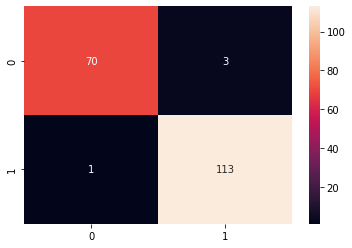

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction_RF)
#print(cm)
# Let's view a more asthetic confusion matrix

# import seaborn as sn
# plt.figure(figsize = (4, 3))
# sn.heatmap(cm, annot= True)
# plt.xlabel("Predicted")
# plt.ylabel("Truth")
sns.heatmap(cm, annot=True, fmt="d")

The prediction for this image is:  0
The actual label for this image is:  0


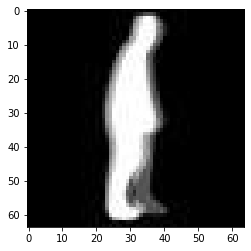

In [ ]:
#Check results on a few select images
n=np.random.randint(7, X_test.shape[0])
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
#prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", y_test[n])